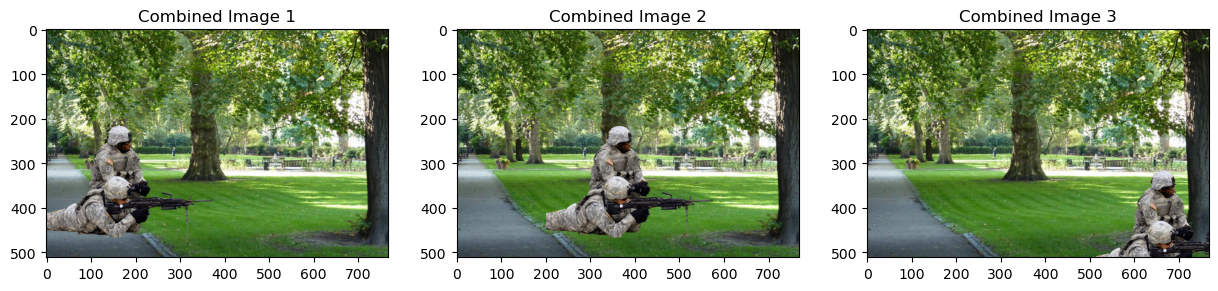

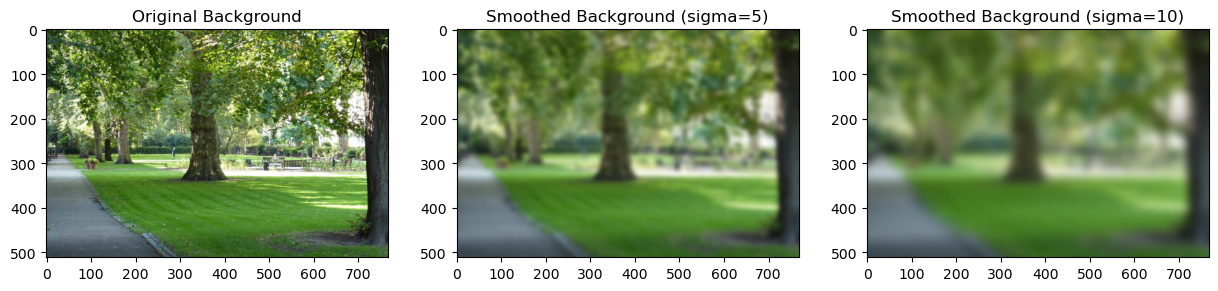

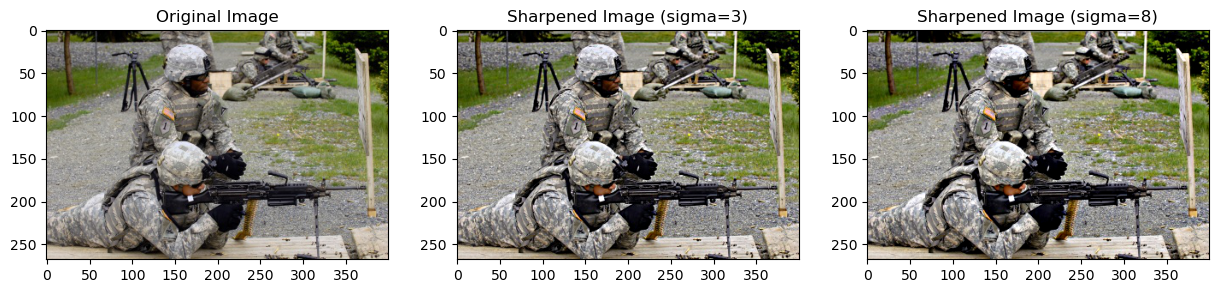

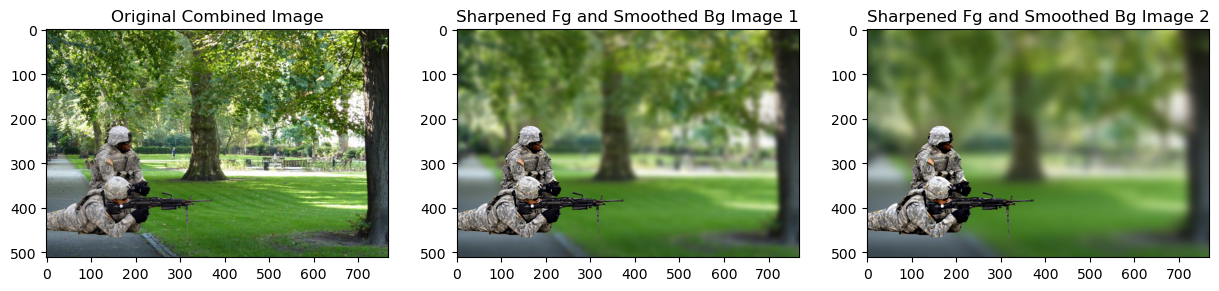

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.imread('0615.jpg')
maskOfImage=cv2.imread('0615.png',0)
foreground=cv2.bitwise_and(image,image,mask=maskOfImage)
background=cv2.imread('park.png')
originalBackground=background.copy()
orgBackground2=background.copy()
orgBackground3=background.copy()

def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):
    fgMask=cv2.threshold(fgMask, 127, 255, cv2.THRESH_BINARY)[1]
    bgMask=cv2.bitwise_not(fgMask)
    rows, cols, channels = fgImg.shape
    roi=bgImg[topLeft[1]:topLeft[1]+rows, topLeft[0]:topLeft[0]+cols]
    
    if topLeft[0]+cols>bgImg.shape[1]:
        cols=bgImg.shape[1]-topLeft[0]
        roi=bgImg[topLeft[1]:topLeft[1]+rows, topLeft[0]:topLeft[0]+cols]
        fgImg=fgImg[:, :cols]
        fgMask=fgMask[:, :cols]
        bgMask=bgMask[:, :cols]
    
    if topLeft[1]+rows>bgImg.shape[0]:
        rows=bgImg.shape[0]-topLeft[1]
        roi=bgImg[topLeft[1]:topLeft[1]+rows, topLeft[0]:topLeft[0]+cols]
        fgImg=fgImg[:rows, :]
        fgMask=fgMask[:rows, :]
        bgMask=bgMask[:rows, :]
    
    fgImgMasked=cv2.bitwise_and(fgImg, fgImg, mask=fgMask)
    bgImgMasked=cv2.bitwise_and(roi, roi, mask=bgMask)
    combinedImg=cv2.add(fgImgMasked, bgImgMasked)
    bgImg[topLeft[1]:topLeft[1]+rows, topLeft[0]:topLeft[0]+cols]=combinedImg

    return bgImg

newImage=combineForegroundBackground(foreground,maskOfImage,background,(0,200))
newImage=cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB)
newImage2=combineForegroundBackground(foreground,maskOfImage,orgBackground2,(200,200))
newImage2=cv2.cvtColor(newImage2, cv2.COLOR_BGR2RGB)
newImage3=combineForegroundBackground(foreground,maskOfImage,orgBackground3,(500,300))
newImage3=cv2.cvtColor(newImage3, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(newImage)
ax1.set_title('Combined Image 1')
ax2.imshow(newImage2)
ax2.set_title('Combined Image 2')
ax3.imshow(newImage3)
ax3.set_title('Combined Image 3')
plt.show()

def gaussianSmoothing(img, sigma):
    size=int(6*sigma+1)
    if size%2==0:
        size=size+1
    kernelX=cv2.getGaussianKernel(size, sigma)
    kernelY=cv2.getGaussianKernel(size, sigma).T
    smoothedImg=cv2.sepFilter2D(img, -1, kernelX, kernelY, borderType=cv2.BORDER_REPLICATE)
    return smoothedImg

originalBackground1=cv2.cvtColor(originalBackground, cv2.COLOR_BGR2RGB)

smoothedImage1=gaussianSmoothing(originalBackground, 5)
copysmoothedImage1=smoothedImage1.copy()
smoothedImage1=cv2.cvtColor(smoothedImage1, cv2.COLOR_BGR2RGB)

smoothedImage2=gaussianSmoothing(originalBackground, 10)
copySmoothedImage2=smoothedImage2.copy()
smoothedImage2=cv2.cvtColor(smoothedImage2, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(originalBackground1)
ax1.set_title('Original Background')
ax2.imshow(smoothedImage1)
ax2.set_title('Smoothed Background (sigma=5)')
ax3.imshow(smoothedImage2)
ax3.set_title('Smoothed Background (sigma=10)')
plt.show()

def unsharpMasking(img, sigma):
    smoothedImg=gaussianSmoothing(img, sigma)
    unsharpMaskedImg=cv2.addWeighted(img, 1.5, smoothedImg, -0.5, 0)
    return unsharpMaskedImg

orgImg1=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sharpenedImage1=unsharpMasking(image, 3)
copySharpenedImage1=sharpenedImage1.copy()
sharpenedImage1=cv2.cvtColor(sharpenedImage1, cv2.COLOR_BGR2RGB)

sharpenedImage2=unsharpMasking(image, 8)
copySharpenedImage2=sharpenedImage2.copy()
sharpenedImage2=cv2.cvtColor(sharpenedImage2, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(orgImg1)
ax1.set_title('Original Image')
ax2.imshow(sharpenedImage1)
ax2.set_title('Sharpened Image (sigma=3)')
ax3.imshow(sharpenedImage2)
ax3.set_title('Sharpened Image (sigma=8)')
plt.show()

combinedImage1=combineForegroundBackground(image,maskOfImage,background,(0,200))
combinedImage1=cv2.cvtColor(combinedImage1, cv2.COLOR_BGR2RGB)

combinedImage2=combineForegroundBackground(copySharpenedImage1,maskOfImage,copysmoothedImage1,(0,200))
combinedImage2=cv2.cvtColor(combinedImage2, cv2.COLOR_BGR2RGB)

combinedImage3=combineForegroundBackground(copySharpenedImage2,maskOfImage,copySmoothedImage2,(0,200))
combinedImage3=cv2.cvtColor(combinedImage3, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(combinedImage1)
ax1.set_title('Original Combined Image')
ax2.imshow(combinedImage2)
ax2.set_title('Sharpened Fg and Smoothed Bg Image 1')
ax3.imshow(combinedImage3)
ax3.set_title('Sharpened Fg and Smoothed Bg Image 2')
plt.show()